In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torchvision

from utils.dataloader import ProteinDataset, get_data_loaders, get_test_loader
from models.densenet import Atlas_DenseNet
from models.uselessnet import UselessNet
from utils.metrics import f1_score

In [3]:
a = torch.rand(4,5)
a.sum(0)

tensor([1.6285, 2.5889, 1.6071, 1.3302, 2.5778])

In [4]:
train_labels_path = f"./data/train.csv"
test_submission_path = f"./data/sample_submission.csv"
train_images_path = f"./data/train/"
test_images_path = f"./data/test/"

In [45]:
b = ProteinDataset()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


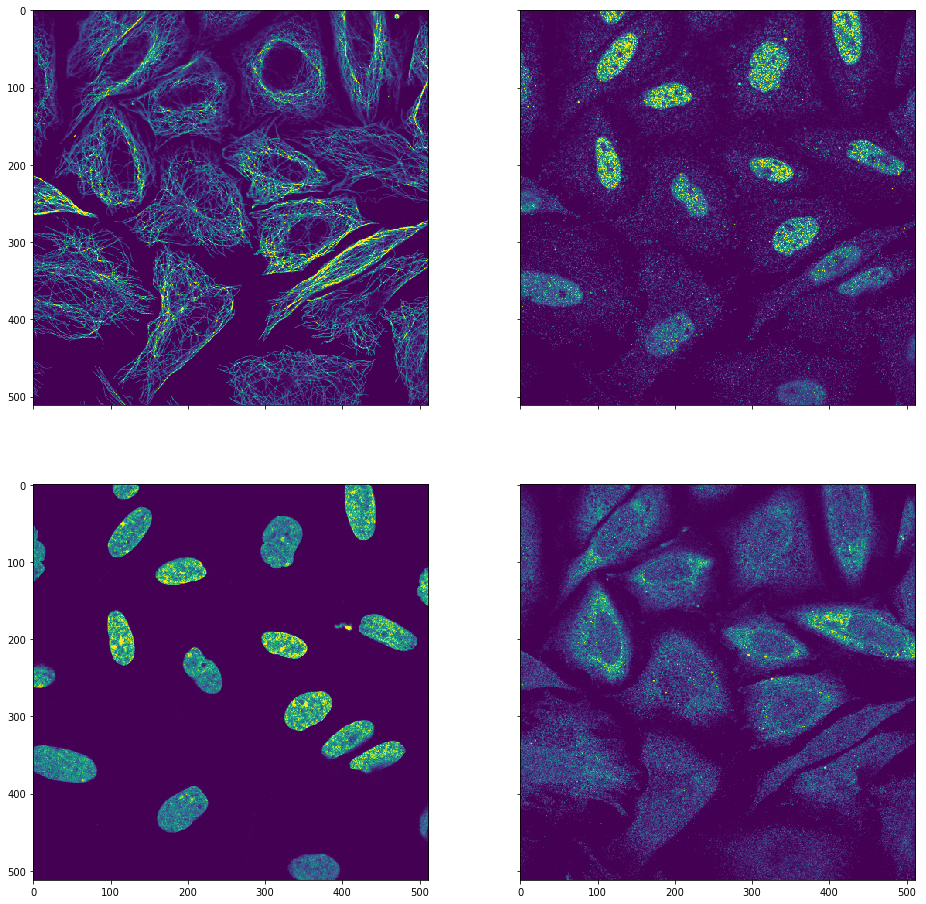

In [10]:
_, axes = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(16, 16))
for i in range(4):
    axes[i // 2, i % 2].imshow(data[125][0][:, :, i])

In [9]:
d, e = get_data_loaders(imsize=512, test_size=0.8)

In [ ]:
batch = next(iter(d))

In [58]:
t = get_test_loader(imsize=256)

In [61]:
batch = next(iter(t))

In [24]:
dn = torchvision.models.densenet121(pretrained=True)

In [27]:
dn.features

Sequential(
  (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu0): ReLU(inplace)
  (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (denseblock1): _DenseBlock(
    (denselayer1): _DenseLayer(
      (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace)
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU(inplace)
      (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (denselayer2): _DenseLayer(
      (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace)
      (conv1): Conv2d(96, 128, kernel_size=(1, 1), st

In [138]:
from torchvision.models import densenet121, densenet161, densenet169, densenet201

In [139]:
dnet = [densenet121, densenet169, densenet201, densenet161]

In [4]:
tdf = pd.read_csv(train_labels_path)

In [11]:
def label_gen(labelstr):
    label = np.zeros(28, dtype='uint8')
    labelstr = labelstr.split()
    for l in labelstr:
        label[int(l)]=1
    return label

In [12]:
tdf['labels'] = tdf['Target'].apply(label_gen)

In [17]:
from skmultilearn.model_selection import iterative_train_test_split

In [20]:
np.stack(tdf['labels']).shape

(31072, 28)

In [26]:
x = np.arange(len(tdf))

In [28]:
x[:, None].shape

(31072, 1)

In [30]:
x[:, None][5, :]

array([5])

In [32]:
Xt, yt, xtest, ytest = iterative_train_test_split(np.arange(len(tdf))[:, None], np.stack(tdf['labels']), test_size=0.2)

In [44]:
len(tdf)

31072

In [53]:
tdf.loc(3)

ValueError: No axis named 3 for object type <class 'pandas.core.frame.DataFrame'>

In [63]:
x.astype(np.float).dtype

dtype('float64')

In [56]:
tdf.loc[Xt.squeeze(1)]

,Id,Target,labels
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
12,0032a07e-bba9-11e8-b2ba-ac1f6b6435d0,24 0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
13,00344514-bbc2-11e8-b2bb-ac1f6b6435d0,23,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
14,00357b1e-bba9-11e8-b2ba-ac1f6b6435d0,6 2,"[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
15,00383b44-bbbb-11e8-b2ba-ac1f6b6435d0,25,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18,003feb6e-bbca-11e8-b2bc-ac1f6b6435d0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
19,0042017c-bba4-11e8-b2b9-ac1f6b6435d0,25 11,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
20,00456fd2-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,"[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."


In [43]:
tdf[Xt.squeeze(1)]

KeyError: '[    2     3     7 ... 27703 28934 30255] not in index'

In [34]:
len(Xt)

6236

In [35]:
len(yt)

6236

In [36]:
len(xtest)

24836

In [37]:
len(ytest)

24836

In [22]:
for i in tdf.head()['Id']:
    print(i)

00070df0-bbc3-11e8-b2bc-ac1f6b6435d0
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0
001838f8-bbca-11e8-b2bc-ac1f6b6435d0


In [23]:
import cv2
imagepath = train_images_path + tdf['Id'][0] + "_blue.png"
i = cv2.imread(imagepath, cv2.IMREAD_GRAYSCALE)

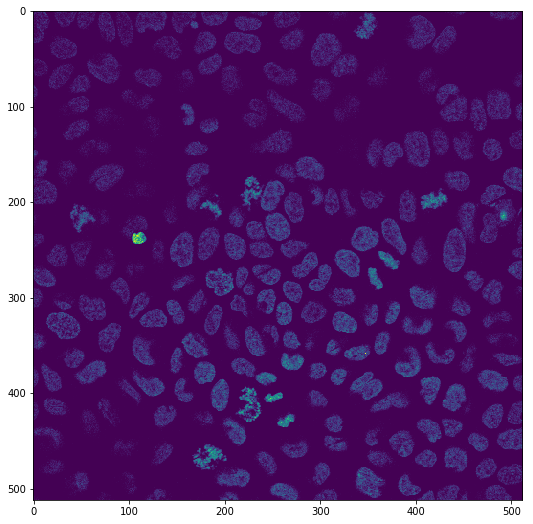

In [27]:
plt.figure(figsize=(12,9))
plt.imshow(i)

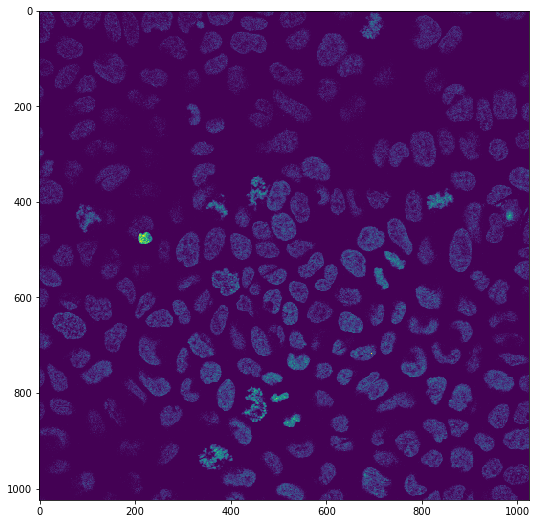

In [33]:
plt.figure(figsize=(12,9))
plt.imshow(cv2.resize(i,None,fx=2, fy=2, interpolation = cv2.INTER_AREA))

In [54]:
from tqdm import tqdm

In [55]:
for i in tqdm(tdf['Id']):
    pass

100%|██████████| 31072/31072 [00:00<00:00, 1598319.99it/s]


In [121]:
from torchvision.models import resnet18, resnet34, resnet50, resnet101, resnet152

In [132]:
net = resnet18(pretrained=True)
net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [126]:
nets = [resnet18, resnet34, resnet50, resnet101, resnet152]

In [139]:
net.conv1.weight.data.shape

torch.Size([64, 3, 7, 7])

In [140]:
for n in nets:
    net = n()
    print(net.conv1)
    print(net.fc)

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
Linear(in_features=512, out_features=1000, bias=True)
Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
Linear(in_features=512, out_features=1000, bias=True)
Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
Linear(in_features=2048, out_features=1000, bias=True)
Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
Linear(in_features=2048, out_features=1000, bias=True)
Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
Linear(in_features=2048, out_features=1000, bias=True)


In [149]:
def Atlas_ResNet(modeln = "resnet34", pretrained=False):
    """
    Params:
        model: ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']
        bn_size (int) - multiplicative factor for number of bottle neck layers
            (i.e. bn_size * k features in the bottleneck layer)
        drop_rate (float) - dropout rate after each dense layer
    """
    if modeln == "resnet18":
        model = resnet18
        cin_features = 512
    elif modeln == "resnet34":
        model = resnet34
        cin_features = 512
    elif modeln == "resnet50":
        model = resnet50
        cin_features = 2048
    elif modeln == "resnet101":
        model = resnet101
        cin_features = 2048
    elif modeln == "resnet152":
        model = resnet152
        cin_features = 2048
    else:
        raise ValueError('Model name not recognized.')
    model = model(pretrained=pretrained)

    model.fc = nn.Linear(cin_features*4, 28)

    nconv = nn.Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    if pretrained:
        print('Loading weights...')
        nconv.weight.data[:,:3,:,:] = model.conv1.weight.data.clone()
        nconv.weight.data[:,3,:,:] = model.conv1.weight.data[:,1,:,:].clone()
    
    model.conv1 = nconv

    return model

In [147]:
ti = torch.Tensor(10, 4, 256, 256)

In [154]:
net = Atlas_ResNet("resnet50", True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/litemax/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [01:51<00:00, 920622.13it/s]


Loading weights...


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/litemax/.torch/models/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [03:37<00:00, 821774.91it/s] 


Loading weights...


Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /home/litemax/.torch/models/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [04:16<00:00, 939877.15it/s] 


Loading weights...


In [152]:
net(ti)

tensor([[ 0.9741,  1.0195, -0.1737, -0.0360,  1.2478, -0.2701, -0.8181, -0.2007,
         -0.0279,  0.4219, -0.0917, -0.3554, -0.1122,  0.5440,  0.3223, -1.1751,
          0.6428, -0.0953, -0.0649, -0.8347,  0.3658,  0.9306, -0.0194, -0.2520,
         -0.0691, -0.7061,  0.0696, -0.2375],
        [ 0.9741,  1.0195, -0.1737, -0.0360,  1.2478, -0.2701, -0.8181, -0.2007,
         -0.0279,  0.4219, -0.0917, -0.3554, -0.1122,  0.5440,  0.3223, -1.1751,
          0.6428, -0.0953, -0.0649, -0.8347,  0.3658,  0.9306, -0.0194, -0.2520,
         -0.0691, -0.7061,  0.0696, -0.2375],
        [ 0.9741,  1.0195, -0.1737, -0.0360,  1.2478, -0.2701, -0.8181, -0.2007,
         -0.0279,  0.4219, -0.0917, -0.3554, -0.1122,  0.5440,  0.3223, -1.1751,
          0.6428, -0.0953, -0.0649, -0.8347,  0.3658,  0.9306, -0.0194, -0.2520,
         -0.0691, -0.7061,  0.0696, -0.2375],
        [ 0.9741,  1.0195, -0.1737, -0.0360,  1.2478, -0.2701, -0.8181, -0.2007,
         -0.0279,  0.4219, -0.0917, -0.3554, -0.1122

In [5]:
from pretrainedmodels.models import bninception

In [26]:
net = Atlas_BNInception(pretrained=True)

Loading weights...


In [22]:
t2 = torch.Tensor(10, 4, 256, 256)
t5 = torch.Tensor(10, 4, 512, 512)

In [21]:
net(t2).shape

torch.Size([10, 28])

In [23]:
net(t5).shape

torch.Size([10, 28])

In [5]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

reverse_train_labels = dict((v,k) for k,v in label_names.items())

def fill_targets(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

In [6]:
train_labels = pd.read_csv(train_labels_path)
train_labels.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [7]:
for key in label_names.keys():
    train_labels[label_names[key]] = 0

In [8]:
train_labels = train_labels.apply(fill_targets, axis=1)
train_labels.head()

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]",1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,[1],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,[18],0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
import seaborn as sns

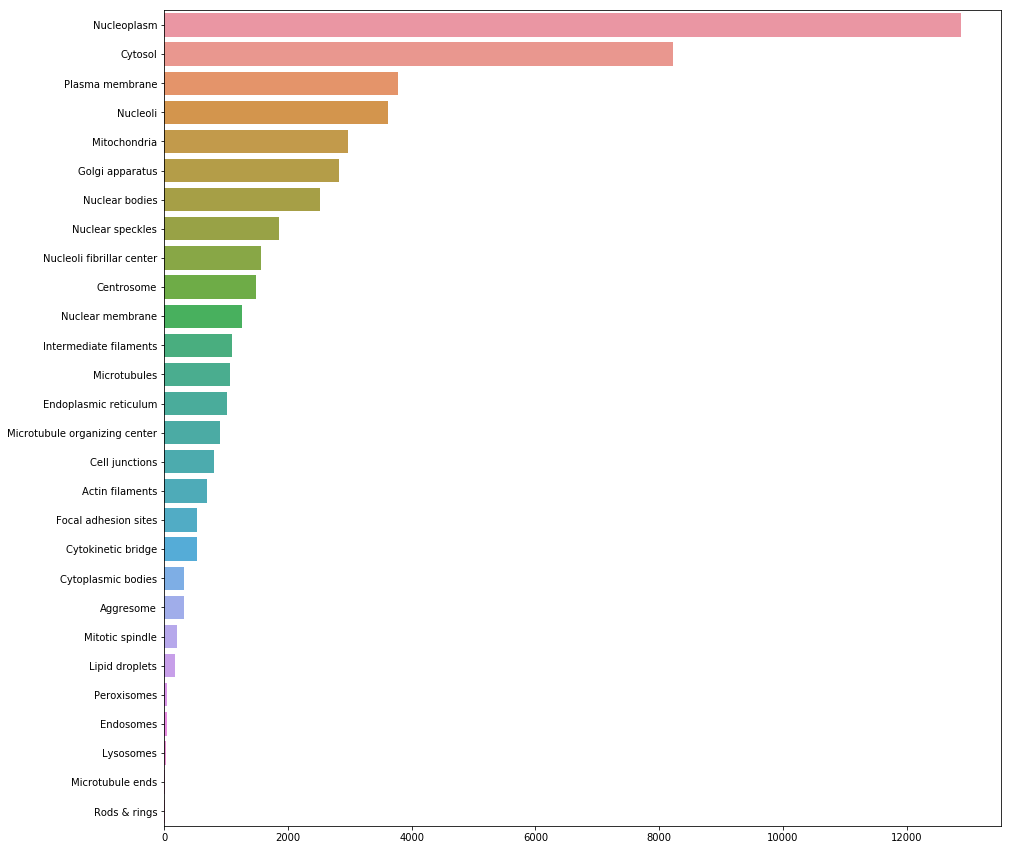

In [10]:
target_counts = train_labels.drop(["Id", "Target"],axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)

In [17]:
aug = pd.read_csv('./data/subcellular/augment.csv')
aug.columns = ['Id', 'Target']

In [18]:
for key in label_names.keys():
    aug[label_names[key]] = 0

In [19]:
aug

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,1,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,5 14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,5 14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,5 14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
aug = aug.apply(fill_targets, axis=1)
aug.head()

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,1,[25],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,[25],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,[25],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,[25],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,[25],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


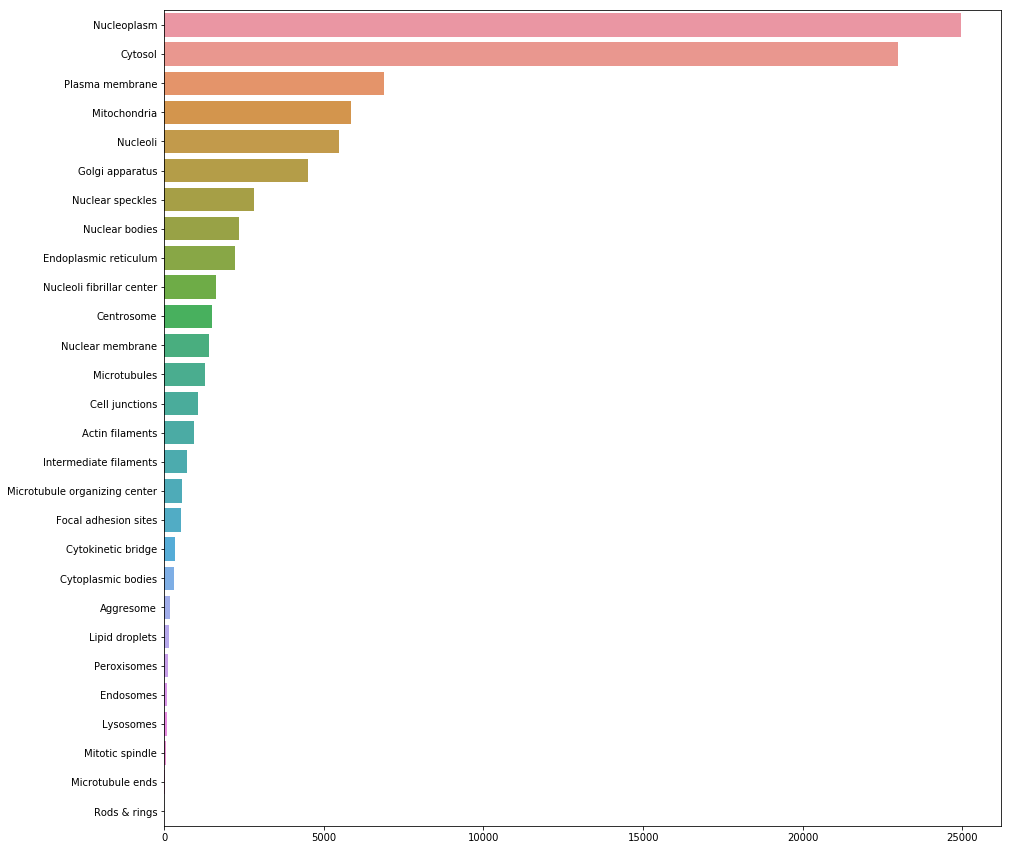

In [21]:
target_counts_aug = aug.drop(["Id", "Target"],axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(y=target_counts_aug.index.values, x=target_counts_aug.values, order=target_counts_aug.index)

In [112]:
target_counts = train_labels.drop(["Id", "Target"],axis=1).sum(axis=0)

In [187]:
eval_f1s = np.array([0.87121299, 0.89525368, 0.84409767, 0.79507134, 0.83933518, 0.74604847,
 0.67569031, 0.84923772, 0.80851064, 0.85714286, 0.90196078, 0.79254537,
 0.68638132, 0.67877629, 0.89150943, 0.71794872, 0.59922929, 0.63546798,
 0.60964912, 0.71453468, 0.56930693, 0.7142676,  0.65201465, 0.85009359,
 0.8,        0.74341019, 0.60252366, 0.57142857])
eval_f1s.argsort()

array([20, 27, 16, 26, 18, 17, 22,  6, 13, 12, 21, 19, 15, 25,  5, 11,  3,
       24,  8,  4,  2,  7, 23,  9,  0, 14,  1, 10])

In [194]:
eval_f1s[[20, 27, 16, 26, 18, 17, 22,  6, 13, 12, 21, 19, 15, 25,  5, 11,  3,
       24,  8,  4,  2,  7, 23,  9,  0, 14,  1, 10]]

array([0.56930693, 0.57142857, 0.59922929, 0.60252366, 0.60964912,
       0.63546798, 0.65201465, 0.67569031, 0.67877629, 0.68638132,
       0.7142676 , 0.71453468, 0.71794872, 0.74341019, 0.74604847,
       0.79254537, 0.79507134, 0.8       , 0.80851064, 0.83933518,
       0.84409767, 0.84923772, 0.85009359, 0.85714286, 0.87121299,
       0.89150943, 0.89525368, 0.90196078])

In [183]:
eval_f1s = np.array([0.87121299, 0.89525368, 0.84409767, 0.79507134, 0.83933518, 0.74604847,
 0.67569031, 0.84923772, 0.80851064, 0.85714286, 0.90196078, 0.79254537,
 0.68638132, 0.67877629, 0.89150943, 0.71794872, 0.59922929, 0.63546798,
 0.60964912, 0.71453468, 0.56930693, 0.7142676,  0.65201465, 0.85009359,
 0.8,        0.74341019, 0.60252366, 0.57142857])
eval_f1s -= eval_f1s.min() - 0.025
eval_f1s /= eval_f1s.max()
rdf = pd.DataFrame(data=eval_f1s, index=target_counts.index, columns=['Eval_F1'])
rdf['count'] = [12885, 1254, 3621, 1561, 1858, 2513, 1008, 2822, 53, 45, 28, 1093,
                688, 537, 1066, 21, 530, 210, 902, 1482, 172, 3777, 802, 2965, 322, 8228, 328, 11]

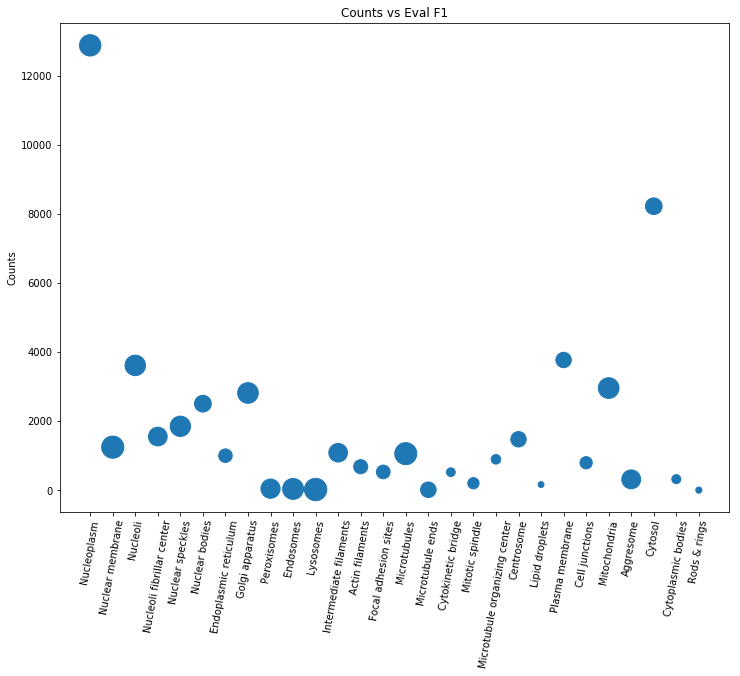

In [185]:
plt.figure(figsize=(12,9))
plt.scatter(rdf.index, rdf['count'], s=rdf['Eval_F1']*500)
plt.xticks(rotation=80)
plt.ylabel('Counts')
plt.title('Counts vs Eval F1')
plt.savefig('EvalF1 vs counts.png')

In [97]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
ros = RandomOverSampler(random_state=0)

In [20]:
RandomOverSampler?

In [10]:
train_labels

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]",1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,[1],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,[18],0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,[0],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0020af02-bbba-11e8-b2ba-ac1f6b6435d0,"[25, 2]",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,[0],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,00285ce4-bba0-11e8-b2b9-ac1f6b6435d0,"[2, 0]",1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,002daad6-bbc9-11e8-b2bc-ac1f6b6435d0,[7],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [106]:
ros = RandomOverSampler(sampling_strategy=sd, random_state=0)
ros1 = RandomOverSampler(random_state=0)

In [87]:
from utils.misc import label_gen_tensor, label_gen_np

In [88]:
df = pd.read_csv(train_labels_path)

In [89]:
df['Target'] = df['Target'].apply(label_gen_np)

In [107]:
X = np.arange(len(df)).reshape(-1, 1)
y = np.vstack(df['Target'].as_matrix())
X_resampled, y_resampled = ros.fit_resample(X, y)

ValueError: The {10, 15} target class is/are not present in the data.

In [103]:
print(X.shape, X_resampled.shape)
print(y.shape, y_resampled.shape)

(31072, 1) (335010, 1)
(31072, 28) (335010, 26)


In [215]:
cto = [20, 27, 16, 26, 18, 17, 22,  6, 13, 12]
rdf['count'].as_matrix()[cto]

array([ 172,   11,  530,  328,  902,  210,  802, 1008,  537,  688])

In [241]:
def custom_over_sampler(df, factor=5, num_classes=10):
    worst_classes = [20, 27, 16, 26, 18, 17, 22,  6, 13, 12, 21, 19, 15, 25,  5, 11,  3,
       24,  8,  4,  2,  7, 23,  9,  0, 14,  1, 10]
    cto = worst_classes[:num_classes]
    np_df = df['Target'].apply(label_gen_np)
    c = []
    for i in range(len(df)):
        if(np.any(np_df[i][cto] == 1)):
            c.append(i)
    df = df.append([df.iloc[c]]*(factor-1),ignore_index=True)
    return df

In [242]:
train_df = pd.read_csv(train_labels_path)
train_df = custom_over_sampler(train_df)
train_df

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18
5,001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,0
6,0020af02-bbba-11e8-b2ba-ac1f6b6435d0,25 2
7,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,0
8,00285ce4-bba0-11e8-b2b9-ac1f6b6435d0,2 0
9,002daad6-bbc9-11e8-b2bc-ac1f6b6435d0,7


In [256]:
from skmultilearn.model_selection import iterative_train_test_split
images_df = pd.read_csv(train_labels_path)
# train_df, valid_df = train_test_split(images_df, test_size=test_size, random_state=42)
images_df['labels'] = images_df['Target'].apply(label_gen_np)
valid_idx, _, train_idx, _ = iterative_train_test_split(np.arange(len(images_df))[:, None], 
                                np.stack(images_df['labels']), test_size=0.1)
train_df = images_df.loc[train_idx.squeeze(1)]
valid_df = images_df.loc[valid_idx.squeeze(1)]

train_df = train_df.reset_index()
valid_df = valid_df.reset_index()

In [257]:
c=0
for i in range(len(train_df)):
    if (train_df['labels'][i][27] == 1):
        c+=1
c

9

In [258]:
c=0
for i in range(len(valid_df)):
    if (valid_df['labels'][i][27] == 1):
        c+=1
c

2

In [245]:
train_df

,index,Id,Target,labels
0,2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,5,001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,6,0020af02-bbba-11e8-b2ba-ac1f6b6435d0,25 2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,7,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,9,002daad6-bbc9-11e8-b2bc-ac1f6b6435d0,7,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
7,13,00344514-bbc2-11e8-b2bb-ac1f6b6435d0,23,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,16,0038d6a6-bb9a-11e8-b2b9-ac1f6b6435d0,25 0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,17,003957a8-bbb7-11e8-b2ba-ac1f6b6435d0,25,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [259]:
np.array(
    [0.90493195, 0.9052774,  0.87606412, 0.82268722, 0.86903962, 0.78751543, 0.92653465,
 0.8790397,  0.75229358, 0.96045198, 0.96644295, 0.82130872, 0.94930475, 0.94831799,
 0.93720096, 0.91891892, 0.94022679, 0.93924783, 0.92180252, 0.7569212,  0.95209935,
 0.81330011, 0.9376892,  0.85623197, 0.85676741, 0.80763054, 0.92940454, 0.89108911]).mean()

0.8867050182142858